In [176]:
import numpy as np
import pandas as pd

In [177]:
df = pd.read_csv("Titanic-Dataset.csv")

In [178]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [179]:
df = df.drop(columns=["PassengerId", "Survived", "Name", "Ticket", "Cabin"])

In [180]:
df

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,S
887,1,female,19.0,0,0,30.0000,S
888,3,female,NaN,1,2,23.4500,S
889,1,male,26.0,0,0,30.0000,C


In [181]:
X = df.iloc[:, 0:6]
y = df.iloc[:, 6:]

In [182]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,male,22.0,1,0,7.2500
1,1,female,38.0,1,0,71.2833
2,3,female,26.0,0,0,7.9250
3,1,female,35.0,1,0,53.1000
4,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000
887,1,female,19.0,0,0,30.0000
888,3,female,NaN,1,2,23.4500
889,1,male,26.0,0,0,30.0000


In [183]:
y

,Embarked
0,S
1,C
2,S
3,S
4,S
...,...
886,S
887,S
888,S
889,C


In [184]:
df.isnull().sum()

Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [185]:
df["Embarked"] = df["Embarked"].dropna()

In [186]:
from sklearn.model_selection import train_test_split

In [187]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [188]:
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare
331,1,male,45.5,0,0,28.5000
733,2,male,23.0,0,0,13.0000
382,3,male,32.0,0,0,7.9250
704,3,male,26.0,1,0,7.8542
813,3,female,6.0,4,2,31.2750
...,...,...,...,...,...,...
106,3,female,21.0,0,0,7.6500
270,1,male,NaN,0,0,31.0000
860,3,male,41.0,2,0,14.1083
435,1,female,14.0,1,2,120.0000


In [210]:
from sklearn.impute import SimpleImputer

In [212]:
si_age = SimpleImputer()
X_train_age = si_age.fit_transform(X_train[["Age"]])

X_test_age = si_age.transform(X_test[["Age"]])

In [214]:
from sklearn.preprocessing import OneHotEncoder

In [216]:
ohe = OneHotEncoder(drop = "first", handle_unknown = "ignore", sparse_output = False)

X_train_sex = ohe.fit_transform(X_train[["Sex"]])

X_test_sex = ohe.transform(X_test[["Sex"]])

In [218]:
X_test_sex

array([[1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],

In [220]:
type(X_train_age)

numpy.ndarray

In [222]:
X_train_transformed = np.concatenate((X_train_age, X_train_sex), axis = 1)
X_test_transformed = np.concatenate((X_test_age, X_test_sex), axis = 1)

In [224]:
X_test_transformed

array([[29.49884615,  1.        ],
       [31.        ,  1.        ],
       [20.        ,  1.        ],
       [ 6.        ,  0.        ],
       [14.        ,  0.        ],
       [26.        ,  0.        ],
       [29.49884615,  0.        ],
       [16.        ,  1.        ],
       [16.        ,  0.        ],
       [19.        ,  0.        ],
       [37.        ,  1.        ],
       [44.        ,  1.        ],
       [29.49884615,  0.        ],
       [30.        ,  1.        ],
       [36.        ,  1.        ],
       [16.        ,  0.        ],
       [42.        ,  1.        ],
       [29.49884615,  0.        ],
       [27.        ,  1.        ],
       [47.        ,  1.        ],
       [24.        ,  1.        ],
       [34.        ,  1.        ],
       [19.        ,  0.        ],
       [20.        ,  1.        ],
       [29.49884615,  1.        ],
       [10.        ,  1.        ],
       [40.        ,  1.        ],
       [31.        ,  1.        ],
       [ 4.        ,

In [226]:
from sklearn.preprocessing import LabelEncoder

In [228]:
y_train

,Embarked
331,S
733,S
382,S
704,S
813,S
...,...
106,S
270,S
860,S
435,S


In [230]:
le = LabelEncoder()

y_train_embark = le.fit_transform(y_train["Embarked"])

y_test_embark = le.transform(y_test["Embarked"])

In [232]:
y_train_transformed = y_train_embark
y_test_transformed = y_test_embark

In [234]:
y_test_transformed

array([0, 2, 2, 2, 0, 2, 1, 2, 1, 2, 2, 2, 2, 0, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 1, 0, 2, 2, 2, 2, 1,
       0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 1, 2, 2, 0, 2, 1, 2, 2, 2, 2, 1, 2,
       2, 2, 0, 0, 2, 0, 0, 0, 2, 2, 1, 0, 2, 2, 2, 2, 0, 1, 0, 0, 0, 0,
       2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 0, 0, 2, 1, 0,
       2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 0, 2, 0, 2, 2, 1,
       2, 2, 2, 1, 2, 1, 0, 2, 2, 0, 1, 0, 2, 2, 2, 2, 0, 2, 2, 0, 2, 0,
       2, 2, 2])

In [236]:
from sklearn.tree import DecisionTreeClassifier

In [263]:
cfl = DecisionTreeClassifier(max_depth = 5)

cfl.fit(X_train_transformed, y_train_transformed)

DecisionTreeClassifier(max_depth=5)

In [265]:
y_pred = cfl.predict(X_test_transformed)

In [266]:
y_pred

array([2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2,
       2, 2, 0, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2])

In [267]:
from sklearn.metrics import accuracy_score

In [271]:
accuracy = accuracy_score(y_pred, y_test_transformed)

In [273]:
accuracy

0.6815642458100558

In [275]:
scores = []
for i in range(1, 16):
    cfl = DecisionTreeClassifier(max_depth = i)
    cfl.fit(X_train_transformed, y_train_transformed)
    y_pred = cfl.predict(X_test_transformed)
    accu = accuracy_score(y_test_transformed, y_pred)
    scores.append(accu)

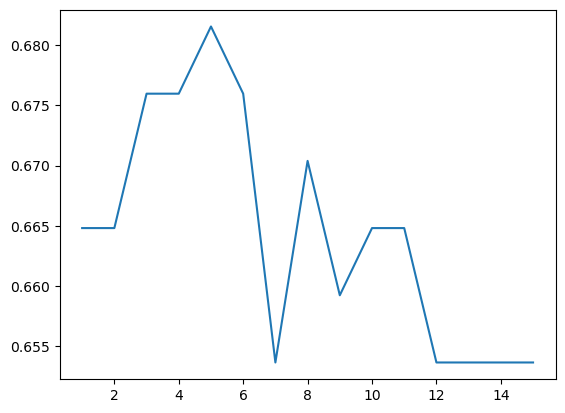

In [277]:
import matplotlib.pyplot as plt

plt.plot(range(1, 16), scores)
plt.show()